In [3]:
''' 
 Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering
 Date; 10. 11. 2021 - 10. 15. 2021
 Title: Pytorch tutorial: Follow [Text] part code
 Professor: Seung-Hoon Na
 Reference: https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html'''

' \n Author: Yoonhyuck WOO / JBNU_Industrial Information system Engineering\n Date; 10. 11. 2021 - 10. 15. 2021\n Title: Pytorch tutorial: Follow [Text] part code\n Professor: Seung-Hoon Na\n Reference: https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html'

In [4]:
from __future__ import unicode_literals, print_function, division # 'from __future__ ': work python2.x code like python 3.x

from io import open
import glob
import os


def findFiles(path):
    return glob.glob(path) # glob.glob: Return a possibly-empty list of path names that match pathname, which must be a string containing a path specification

print(findFiles(r"C:\Users\LG\Desktop\JBNU_ISE\GITHUB\JBNU-2021-Summer\Pytorch tutorial\Text\data\data\names\*.txt"))

['C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Arabic.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Chinese.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Czech.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Dutch.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\English.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\French.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\German.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pytorch tutorial\\Text\\data\\data\\names\\Greek.txt', 'C:\\Users\\LG\\Desktop\\JBNU_ISE\\GITHUB\\JBNU-2021-Summer\\Pyt

In [4]:
import unicodedata # provides access to the Unicode Character Database (UCD) which defines character properties for all Unicode characters
import string

all_letters = string.ascii_letters + ".,;''" # string.ascii: The concatenation of the 'ascii_lowercase' and 'ascii_uppercase' constants described below. This value is not locale-dependent.
n_letters = len(all_letters)
print('all_letters:', all_letters)
print('n_letters:', n_letters)

all_letters: abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ.,;''
n_letters: 57


# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427

In [5]:
def unicodeToAscii(s):
# join: ['a', 'b', 'c'] -> 'abc'
    return ''.join(
        c for c in unicodedata.normalize('NFD', s) # unicodedata.normalize: Return the normal form form for the Unicode string unistr. Valid values for form are ‘NFC’, ‘NFKC’, ‘NFD’, and ‘NFKD’.
        if unicodedata.category(c) != 'Mn' # Returns the general category assigned to the character chr as string.
        and c in all_letters)
print(unicodeToAscii('Ślusàrski'))

Slusarski


# Build the category_lines dictionary, a list of names per language

In [6]:
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding = 'utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles(r"C:\Users\LG\Desktop\JBNU_ISE\GITHUB\JBNU-2021-Summer\Pytorch tutorial\Text\data\data\names\*.txt"):
    category = os.path.splitext(os.path.basename(filename))[0] # os.path.basename: Return the base name of pathname path
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines
    
n_categories = len(all_categories)

print(category_lines['Italian'][:3])
print(all_categories)

['Abandonato', 'Abatangelo', 'Abatantuono']
['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']


# Turning Names into Tensors

In [7]:
import torch

# Find letter index from all_letters ex) "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)
print('J:', letterToIndex('J'))

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1 
    return tensor

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
        
    return tensor

print(letterToTensor("J"))
print(lineToTensor('Jones').size())
print(lineToTensor('Jones').size()[0])
print(lineToTensor('Jones'))

J: 35
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
torch.Size([5, 1, 57])
5
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
     

# Creating the Network
- Before autograd, creating a recurrent neural network in Torch involved cloning the parameters of a layer over several timesteps
- RNN module: just 2 linear layers which operate on an input and hidden state, with a LogSoftmax layer after the output.

In [8]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim = 1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

'''
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
'''

# For the sake of efficiency we don’t want to be creating a new Tensor for every step, so we will use lineToTensor instead of letterToTensor and use slices. 
#This could be further optimized by pre-computing batches of Tensors.
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9367, -2.8696, -2.9027, -2.8795, -2.9683, -2.8835, -2.8203, -2.8262,
         -2.8703, -2.9190, -2.7647, -2.9371, -2.8856, -3.0210, -2.8925, -2.8491,
         -2.8929, -2.9369]], grad_fn=<LogSoftmaxBackward>)


# Training

# MAKE helper functions 
- to interpret the output of the network, which we know to be a likelihood of each category

In [9]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1) #Tensor.topk:  to get the index of the greatest value
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Japanese', 10)


# A quick way to get a training example (a name and its language)

In [10]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l)-1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype = torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/line =',line)

category = French /line = Girard
category = Japanese /line = Okita
category = Korean /line = Ngai
category = Korean /line = You
category = Italian /line = Zambrano
category = Russian /line = ToTheFirstPage
category = Japanese /line = Harada
category = Chinese /line = Man
category = Arabic /line = Attia
category = Russian /line = Daugule


# Training the Network

In [11]:
criterion = nn.NLLLoss()

In [12]:
'''
Each loop of training will:

 Create input and target tensors
 Create a zeroed initial hidden state
 Read each letter in and
    Keep hidden state for next letter
 Compare final output to target
 Back-propagate
 Return the output and loss
'''

'\nEach loop of training will:\n\n Create input and target tensors\n Create a zeroed initial hidden state\n Read each letter in and\n    Keep hidden state for next letter\n Compare final output to target\n Back-propagate\n Return the output and loss\n'

In [13]:
learning_rate = 0.005 # you need to pick moderate one.

In [14]:
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    loss.backward()
    
    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
        '''
        a = torch.tensor([[1,1],[1,1]])
        b = torch.tensor(2)
        c = torch.tensor(3)
        a.add_(b,c)
        print(a)
        -> tensor([[7, 7],
                  [7, 7]])
        '''
        return output, loss.item()

In [15]:
for p in rnn.named_parameters():
        print(p)

('i2h.weight', Parameter containing:
tensor([[ 0.0703,  0.0256, -0.0187,  ..., -0.0667,  0.0208,  0.0183],
        [ 0.0515, -0.0523, -0.0582,  ...,  0.0652,  0.0544, -0.0025],
        [ 0.0582, -0.0339, -0.0171,  ..., -0.0482, -0.0675,  0.0584],
        ...,
        [-0.0267,  0.0586,  0.0455,  ...,  0.0079,  0.0381, -0.0491],
        [-0.0154,  0.0442, -0.0307,  ..., -0.0187,  0.0308, -0.0439],
        [-0.0012,  0.0030,  0.0220,  ..., -0.0221,  0.0497, -0.0162]],
       requires_grad=True))
('i2h.bias', Parameter containing:
tensor([ 0.0618, -0.0387, -0.0216,  0.0690, -0.0691, -0.0346, -0.0654, -0.0355,
        -0.0482,  0.0384, -0.0120,  0.0453,  0.0227, -0.0351, -0.0360,  0.0045,
        -0.0017, -0.0012, -0.0309, -0.0699, -0.0571, -0.0100, -0.0642,  0.0207,
         0.0023,  0.0607, -0.0044, -0.0019, -0.0043, -0.0549,  0.0530,  0.0382,
         0.0109,  0.0590,  0.0205, -0.0218, -0.0707,  0.0322, -0.0318,  0.0373,
        -0.0418,  0.0507,  0.0253,  0.0467,  0.0589, -0.0463, -0.0

# Run that with a bunch of examples

In [16]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

# Kepp track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s/60) # math.floor: return less than or equal to a specified number
    s -= m * 60
    return '%dm %ds' % (m,s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        '''
        if guess == category:
            correct = '✓'
        else: 'X (%s)' % category
        '''
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))
        
    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 8s) 2.9046 Gro / Spanish ✗ (German)
10000 10% (0m 16s) 2.7001 Blanchet / Greek ✗ (French)
15000 15% (0m 24s) 2.7520 Judasin / Polish ✗ (Russian)
20000 20% (0m 33s) 2.6147 Hong / Chinese ✗ (Korean)
25000 25% (0m 42s) 2.5243 Kalb / Japanese ✗ (Arabic)
30000 30% (0m 52s) 2.7094 Moreno / Italian ✗ (Portuguese)
35000 35% (1m 1s) 2.6112 Pei / German ✗ (Chinese)
40000 40% (1m 9s) 1.2329 Majewski / Polish ✓
45000 45% (1m 18s) 3.3700 Pear / Chinese ✗ (Czech)
50000 50% (1m 27s) 2.5043 Thornes / Czech ✗ (English)
55000 55% (1m 36s) 2.8473 Fausti / Arabic ✗ (Italian)
60000 60% (1m 44s) 1.8699 Zhidkikh / Japanese ✗ (Russian)
65000 65% (1m 53s) 2.0357 Hovanec / Portuguese ✗ (Czech)
70000 70% (2m 1s) 2.0963 Groer / German ✓
75000 75% (2m 10s) 0.2866 Sadowski / Polish ✓
80000 80% (2m 18s) 2.8759 Carey / Portuguese ✗ (Irish)
85000 85% (2m 27s) 2.7562 Vescovi / English ✗ (Italian)
90000 90% (2m 36s) 1.9361 Angioli / Portuguese ✗ (Italian)
95000 95% (2m 44s) 2.9523 Ma / Korean ✗ (Vietnamese)


# Plotting the Results

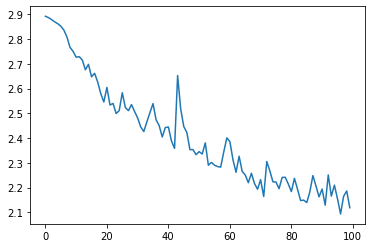

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

# Evaluating the Results

<ipython-input-19-d05b49428171>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation = 90)
<ipython-input-19-d05b49428171>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


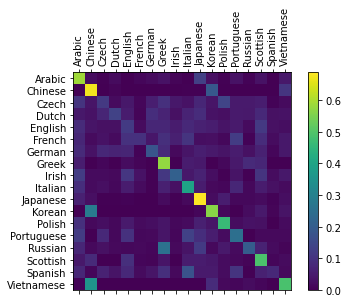

In [19]:
# keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1
    
# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()
    
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation = 90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

# Running on User Input

In [21]:
def predict(input_line, n_predictions = 3 ):
    print('\n> %s' % input_line)
    
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))
        
        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []
        
        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Woo')


> Dovesky
(-1.53) Russian
(-1.74) Czech
(-2.02) Polish

> Jackson
(-0.69) Scottish
(-2.06) Russian
(-2.43) English

> Woo
(-1.62) Korean
(-2.10) Chinese
(-2.45) Scottish


In [22]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-1.53) Russian
(-1.74) Czech
(-2.02) Polish

> Jackson
(-0.69) Scottish
(-2.06) Russian
(-2.43) English

> Satoshi
(-0.99) Polish
(-2.04) Arabic
(-2.17) Scottish
